In [1]:
import growth_simulations as g
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
%load_ext autoreload 

In [3]:
%autoreload 2

In [4]:
def pcc_model(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=delta/(2-delta)*((1-delta)*(np.log(temp_r)/(2*gr))**2-sigma_t**2)
    sigma_tdn=np.sqrt(2*sigma_t**2/(2-delta)+delta/(2-delta)*(np.log(temp_r)/(2*gr))**2)
    sigma_tdn1=np.sqrt((2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2)/(2-delta))
    denom=sigma_tdn*sigma_tdn1
    return num/denom

def pcc_model_siblings(beta, sigma_t, gr, delta):
    # note that the growth function agrees to first order with that in the main text under the substitution delta=alpha
    temp_r=beta/(1-beta)
    num=(2-delta)*sigma_t**2
    denom=2*sigma_t**2+delta*(1-delta)**2*(np.log(temp_r)/(2*gr))**2
    return 1-num/denom

In [5]:
data=np.load('./output_compiled.npy')

In [6]:
1-2*0.7/1.7

0.17647058823529416

In [7]:
1-2*0.5/1.5

0.33333333333333337

In [8]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.3, 4)  # 4
lambda_std = np.linspace(0.0, 0.3, num=7)  # 7
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.array([0.5])  # 1
num_rep = 100  # number of repeats
x=1-2*beta
# # should give 56000 repeats. Run with 1400 job array.
# # should take around 7 hours. 600min.50150767 

par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 15, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]
print data.shape

(4, 7, 20, 1, 100, 3, 9)


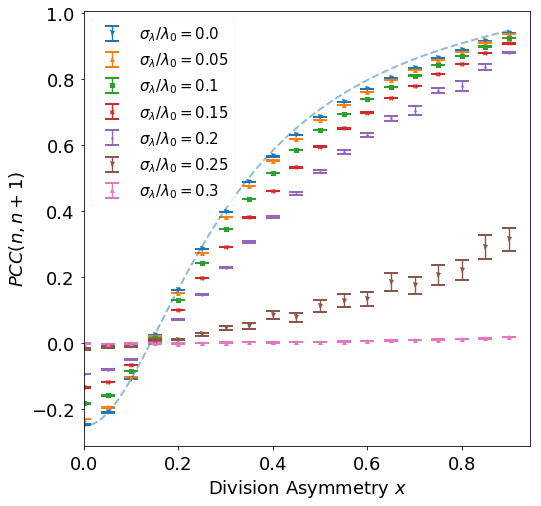

In [12]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=1
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','v','^','s']
# sizes=[8,5,5,5,5]
for ind in range(len(lambda_std)):
    yv=np.mean(data[i0,ind,ind_beta_start:,i1,:,0,0],axis=1)
    ystd=np.std(data[i0,ind,ind_beta_start:,i1,:,0,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_\lambda/\lambda_0={0}$'.format(lambda_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,alpha[i1])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 15})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/parent_mother_var_lambda.eps',dpi=300,bbox_inches='tight')

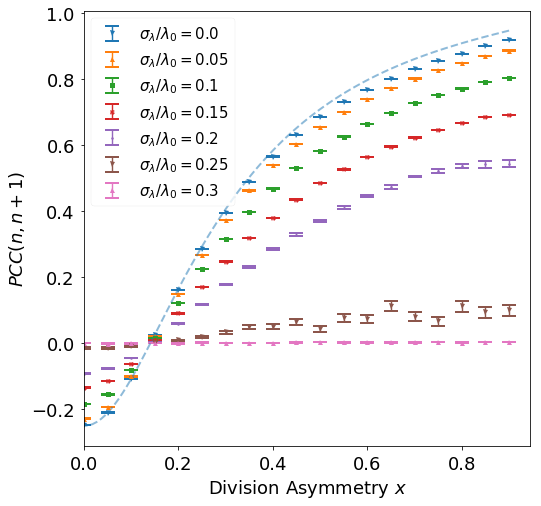

In [13]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=1
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','v','^','s']
# sizes=[8,5,5,5,5]
for ind in range(len(lambda_std)):
    yv=np.mean(data[i0,ind,ind_beta_start:,i1,:,1,0],axis=1)
    ystd=np.std(data[i0,ind,ind_beta_start:,i1,:,1,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_\lambda/\lambda_0={0}$'.format(lambda_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
yv=pcc_model(0.5-0.5*xv,td_std[i0],1.0,alpha[i1])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n,n+1)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 15})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/parent_daughter_var_lambda.eps',dpi=300,bbox_inches='tight')

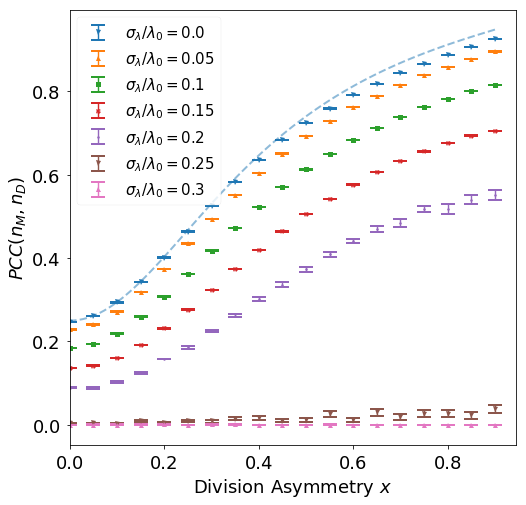

In [14]:
fig=plt.figure(figsize=[8,8])
# sns.set(font_scale=3)
plt.style.use('seaborn-paper')
ax=plt.subplot(1,1,1)
i0=1
i1=0
ind_beta_start=1
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
markers=['v','^','s','X','.','v','^','s']
# sizes=[8,5,5,5,5]
for ind in range(len(lambda_std)):
    yv=np.mean(data[i0,ind,ind_beta_start:,i1,:,2,0],axis=1)
    ystd=np.std(data[i0,ind,ind_beta_start:,i1,:,2,0],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_\lambda/\lambda_0={0}$'.format(lambda_std[ind]),linestyle='None',capsize=7,marker=markers[ind],markersize=5,capthick=2)
#     plt.fill_between(xv,yv-ystd,yv+ystd,alpha=0.3)
xv=np.linspace(x[ind_beta_start],x[-1],100)
plt.gca().set_prop_cycle(None)
# for ind in range(1,5):
yv=pcc_model_siblings(0.5-0.5*xv,td_std[i0],1.0,alpha[i1])
#     plt.plot(xv,yv,label=r'Theory $\alpha={0}$'.format(alpha[ind]),linestyle='--',lw=2)
plt.plot(xv,yv,linestyle='--',lw=2,alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=0)
plt.ylabel(r'$PCC(n_M,n_D)$')
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 15})
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/correlations/siblings_var_lambda.eps',dpi=300,bbox_inches='tight')